In [2]:
import numpy as np
import matplotlib.pyplot as plt

- Sigmoid 함수

In [3]:
def sigmoid(x, a=1, b=0):
    return (1. / (1 + np.exp(-a*(x-b))))

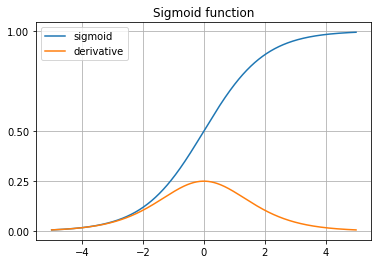

In [4]:
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, ys*(1-ys), label='derivative') # 미분
plt.title('Sigmoid function')
plt.yticks([0, 0.25, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

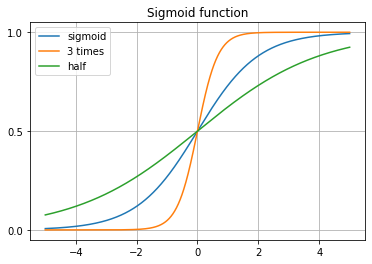

In [8]:
y3 = sigmoid(xs, a=3)
y_half = sigmoid(xs, a=0.5)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, y3, label='3 times')
plt.plot(xs, y_half, label='half')
plt.title('Sigmoid function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

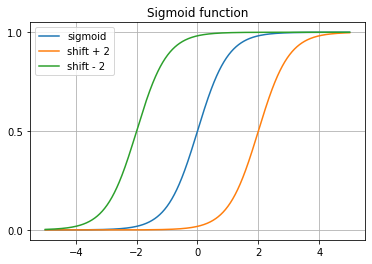

In [11]:
ys = sigmoid(xs, a=2)
y_plus2 = sigmoid(xs, a=2, b=2)
y_minus2 = sigmoid(xs, a=2, b=-2)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, y_plus2, label='shift + 2')
plt.plot(xs, y_minus2, label='shift - 2')
plt.title('Sigmoid function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

- 이진 분류(유방암 데이터 분석)

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [6]:
# 로지스틱 회귀를 위한 데이터 표준화
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [12]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_std, cancer.target, stratify=cancer.target, random_state=2022)

In [13]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2022)
lrc.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [14]:
# X_test가 1이 될 확률
lrc.predict_proba(X_test[:5])

array([[8.72242699e-03, 9.91277573e-01],
       [2.41622685e-01, 7.58377315e-01],
       [1.00000000e+00, 1.21217433e-10],
       [6.40861429e-07, 9.99999359e-01],
       [3.25148309e-04, 9.99674852e-01]])

In [15]:
# X_test가 1이될 확률 = sigmoid(lrc.coef_ * X_test + lrc.intercept_)
lrc.coef_

array([[-0.34405498, -0.48237478, -0.3341254 , -0.42915846, -0.07879762,
         0.56207448, -0.73975027, -0.60531031,  0.04342698,  0.15496439,
        -1.25355709,  0.01114107, -0.78491641, -0.96111243, -0.26653613,
         0.90404346,  0.08264883, -0.33151113,  0.57540241,  0.435543  ,
        -0.9384629 , -1.11676756, -0.79996886, -0.95345339, -0.66727363,
         0.18915746, -0.93918052, -1.03420112, -1.16072205, -0.16299362]])

In [16]:
X_test[0]

array([-0.60418105, -0.84697064, -0.61863699, -0.60178112,  0.06189392,
       -0.61954251, -0.59371599, -0.78127769,  0.97619425, -0.44195364,
       -0.64269945,  0.069211  , -0.70544794, -0.53193707, -0.35734079,
       -0.41124299, -0.39203923, -0.77360013, -0.0995627 , -0.44932623,
       -0.5382468 , -0.12656597, -0.58026425, -0.54966965,  0.23370693,
       -0.34329308, -0.21823207, -0.58296891,  0.77369434, -0.26077671])

In [17]:
lrc.intercept_

array([0.18666884])

In [18]:
val = np.dot(lrc.coef_, X_test[0]) + lrc.intercept_
val

array([4.73309707])

In [19]:
sigmoid(val)    # lrc.predict_proba(X_test[0])과 동일

array([0.99127757])

- 다중 분류(와인 데이터 분석)

In [28]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
X_train, X_test, y_train, y_test = train_test_split(wine_std, wine.target, stratify=wine.target, random_state=2022)

In [29]:
lrc2 = LogisticRegression(random_state=2022)
lrc2.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [30]:
# X_test가 1이 될 확률
lrc2.predict_proba(X_test[:5])

array([[9.99279600e-01, 4.12995370e-04, 3.07404430e-04],
       [9.95459920e-01, 3.04646714e-03, 1.49361273e-03],
       [8.63617063e-03, 1.34269693e-04, 9.91229560e-01],
       [7.75565213e-03, 3.10436345e-03, 9.89139984e-01],
       [9.94151690e-04, 9.89722631e-01, 9.28321721e-03]])

In [39]:
# X_test가 1이될 확률 = sigmoid(lrc2.coef_ * X_test + lrc2.intercept_)
val2 = np.dot(lrc2.coef_, X_test[0]) + lrc2.intercept_

In [40]:
# 다중분류에서는 sigmoid 적용 불가 -> softmax 적용
sigmoid(val2)

array([0.99499679, 0.0759498 , 0.05765112])

In [36]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [38]:
softmax(val2)

array([9.9927960e-01, 4.1299537e-04, 3.0740443e-04])

In [69]:
np.sum(softmax(val2))

1.0